<a href="https://colab.research.google.com/github/Lohliaa/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**

1. Buat Gamma Correction sesuai dengan petunjuk berikut 

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan. 


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
import math

In [4]:
# get image from gdrive
original = cv.imread("/content/drive/MyDrive/PCVK/Week 5/female.tiff")

 Gamma Correction pada Citra 
---------------------------------
Masukkan nilai Gamma: 3


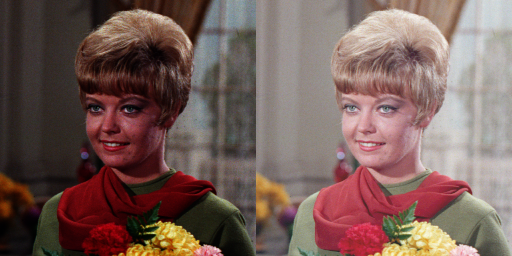

In [5]:
print(' Gamma Correction pada Citra ')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth 


 Bit Depth pada Citra 
---------------------------------
Masukkan nilai Bit Depth: 2


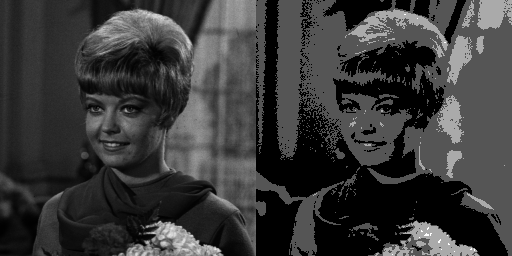

In [6]:
print(' Bit Depth pada Citra ')
print('---------------------------------')
try:
  bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

level = 255 / (pow(2,bit_depth)-1) 

original = cv.imread('/content/drive/MyDrive/PCVK/Week 5/female.tiff', cv.IMREAD_GRAYSCALE) 
bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    # for c in range(original.shape[2]):
      bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

Jumlah Citra 5

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 5
Nilai PSNR:  19.406506141812287
Nilai MSE:  745.4692720094087


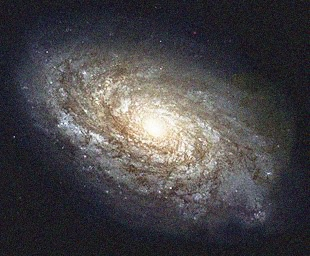

In [21]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/Week 5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week 5/noises/*.jpg'): 
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR: ',psnr)
print('Nilai MSE: ', mse)
cv2_imshow(noised_image)

Jumlah Citra 30

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 30
Nilai PSNR:  19.71654276884592
Nilai MSE:  694.1064561865294


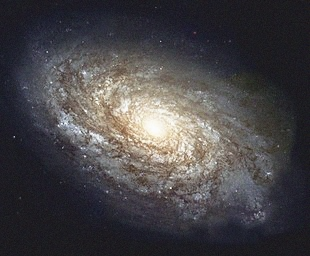

In [20]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/Week 5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week 5/noises/*.jpg'): 
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR: ',psnr)
print('Nilai MSE: ', mse)
cv2_imshow(noised_image)

Jumlah Citra 60


Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 60
Nilai PSNR:  19.745831206118794
Nilai MSE:  689.4412120715725


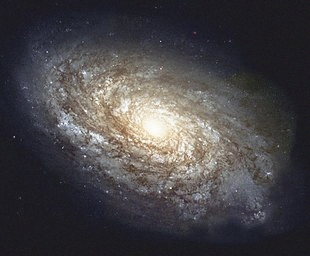

In [19]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/Week 5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week 5/noises/*.jpg'): 
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR: ',psnr)
print('Nilai MSE: ', mse)
cv2_imshow(noised_image)

Jumlah Citra 80

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 80
Nilai PSNR:  19.753415249650875
Nilai MSE:  688.2382980169482


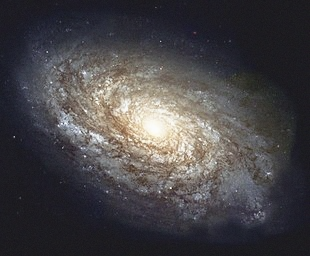

In [18]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/Week 5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week 5/noises/*.jpg'): 
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR: ',psnr)
print('Nilai MSE: ', mse)
cv2_imshow(noised_image)

Jumlah Citra 100

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 100
Nilai PSNR:  19.758317288501708
Nilai MSE:  687.4618968229167


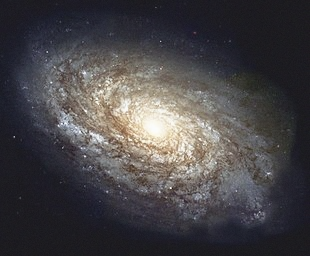

In [17]:
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/Week 5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week 5/noises/*.jpg'): 
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR: ',psnr)
print('Nilai MSE: ', mse)
cv2_imshow(noised_image)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya: 


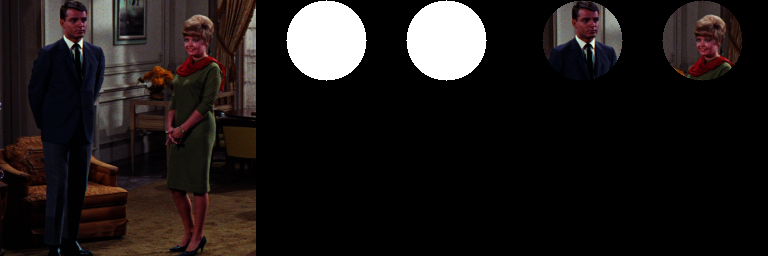

In [12]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/Week 5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t & mask

mask1 = cv.circle(mask, (190, 40), 40, (255,255,255), -1)

result = img_t & mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

5.  Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu. 

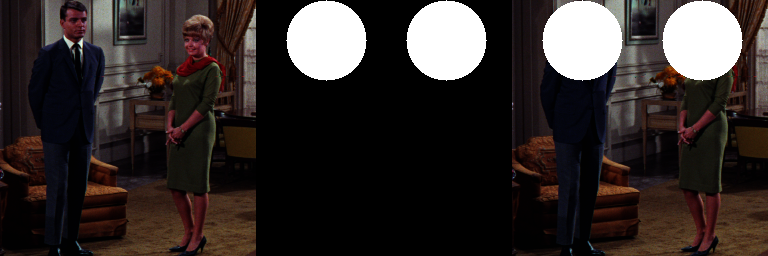

In [13]:
# OPERATOR OR
img_t = cv.imread('/content/drive/MyDrive/PCVK/Week 5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t | mask

mask1 = cv.circle(mask, (190, 40), 40, (255,255,255), -1)

result = img_t | mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

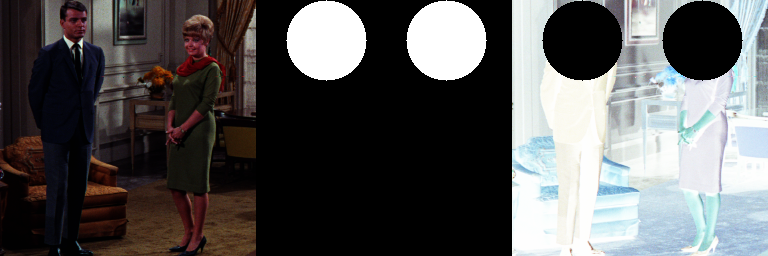

In [14]:
# OPERATOR NOT
img_t = cv.imread('/content/drive/MyDrive/PCVK/Week 5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = ~img_t & ~mask

mask1 = cv.circle(mask, (190, 40), 40, (255,255,255), -1)

result = ~img_t & ~mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

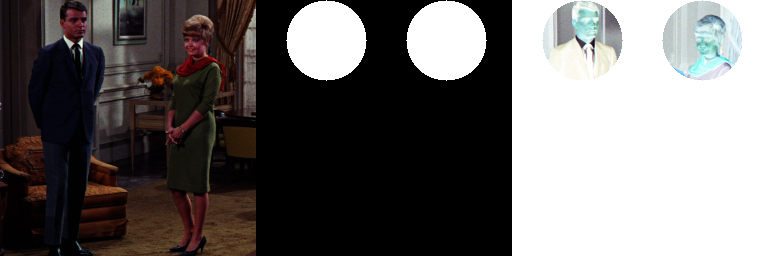

In [15]:
# OPERATOR NAND
img_t = cv.imread('/content/drive/MyDrive/PCVK/Week 5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = ~(img_t & mask)

mask1 = cv.circle(mask, (190, 40), 40, (255,255,255), -1)

result = ~(img_t & mask1)

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

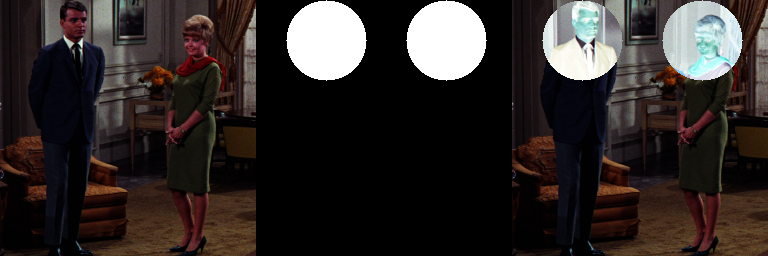

In [16]:
# OPERATOR XOR
img_t = cv.imread('/content/drive/MyDrive/PCVK/Week 5/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t ^ mask

mask1 = cv.circle(mask, (190, 40), 40, (255,255,255), -1)

result = img_t ^ mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)